In [194]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold



%matplotlib inline

In [195]:
df = pd.read_csv('D:/PROJECTS/CLASSIFICATION/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [197]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# ***STOP***
*Every Time doing a classification project stop here and check wether or not classification is imbalanced?????*

0    284315
1       492
Name: Class, dtype: int64
The percentage for Non Fraud Transactions are: 99.82725143693798
The percentage for Fraud Transactions are: 0.1727485630620034


<AxesSubplot:xlabel='Class', ylabel='count'>

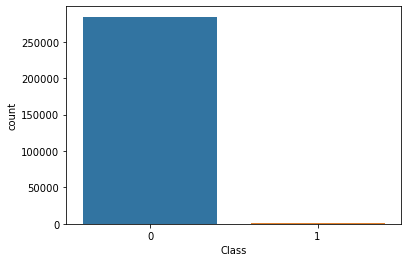

In [198]:
print(df.Class.value_counts())
print(f'The percentage for Non Fraud Transactions are: {df.Class.value_counts()[0] / len(df.Class) * 100}')
print(f'The percentage for Fraud Transactions are: {df.Class.value_counts()[1] / len(df.Class) * 100}')
sns.countplot('Class', data=df)

We can see classification is highly imbalanced.
Make it balanced........................

1    492
0    492
Name: Class, dtype: int64
The percentage for Non Fraud Transactions are: 50.0
The percentage for Fraud Transactions are: 50.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201150,133749.0,2.056155,-1.034311,-0.273776,-0.242266,-1.369636,-0.609696,-0.992733,-0.108871,0.189437,...,-0.154353,0.198285,0.197076,0.077258,-0.367890,0.723649,-0.010254,-0.041038,36.70,0
79703,58137.0,1.407034,-0.887641,-0.706872,-1.807077,1.122582,3.448413,-1.428369,0.895792,-0.657691,...,0.079807,-0.033761,-0.006628,1.009900,0.424125,-0.284603,0.030313,0.023262,26.23,0
20060,30757.0,-0.661993,0.755191,1.127012,0.984521,0.261441,0.567644,0.583195,0.162989,-0.284494,...,0.050272,0.286726,-0.188957,-0.303501,-0.330027,-0.335167,-0.030379,0.131160,57.20,0
55488,46964.0,0.848397,-0.134417,0.278772,1.118367,0.041783,0.427916,0.132896,0.167237,-0.417244,...,0.016793,-0.183515,-0.024720,-0.291277,0.258140,-0.510367,0.025556,0.033241,134.94,0


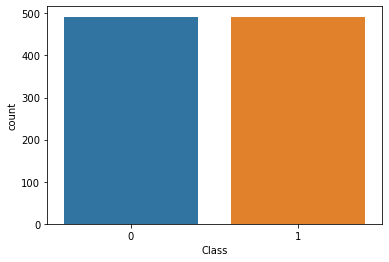

In [199]:
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(n=492)
df = pd.concat([fraud_df, non_fraud_df], axis=0)
print(df.Class.value_counts())
print(f'The percentage for Non Fraud Transactions are: {df.Class.value_counts()[0] / len(df.Class) * 100}')
print(f'The percentage for Fraud Transactions are: {df.Class.value_counts()[1] / len(df.Class) * 100}')
sns.countplot('Class', data=df)
df

**Now continue with all other processes**

In [200]:
X = df.copy()
y = X.pop('Class')
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201150,133749.0,2.056155,-1.034311,-0.273776,-0.242266,-1.369636,-0.609696,-0.992733,-0.108871,0.189437,...,-0.538764,-0.154353,0.198285,0.197076,0.077258,-0.367890,0.723649,-0.010254,-0.041038,36.70
79703,58137.0,1.407034,-0.887641,-0.706872,-1.807077,1.122582,3.448413,-1.428369,0.895792,-0.657691,...,0.243462,0.079807,-0.033761,-0.006628,1.009900,0.424125,-0.284603,0.030313,0.023262,26.23
20060,30757.0,-0.661993,0.755191,1.127012,0.984521,0.261441,0.567644,0.583195,0.162989,-0.284494,...,-0.206102,0.050272,0.286726,-0.188957,-0.303501,-0.330027,-0.335167,-0.030379,0.131160,57.20
55488,46964.0,0.848397,-0.134417,0.278772,1.118367,0.041783,0.427916,0.132896,0.167237,-0.417244,...,0.102482,0.016793,-0.183515,-0.024720,-0.291277,0.258140,-0.510367,0.025556,0.033241,134.94


<AxesSubplot:>

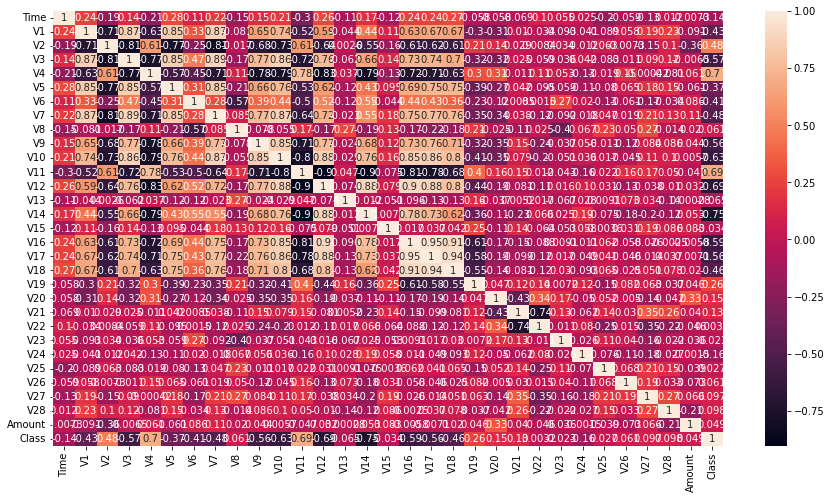

In [201]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

scaling

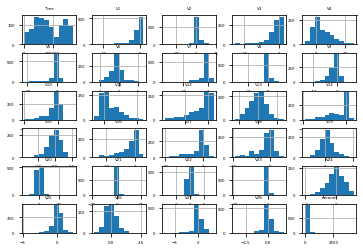

In [202]:
fig = X.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
plt.show()

<AxesSubplot:>

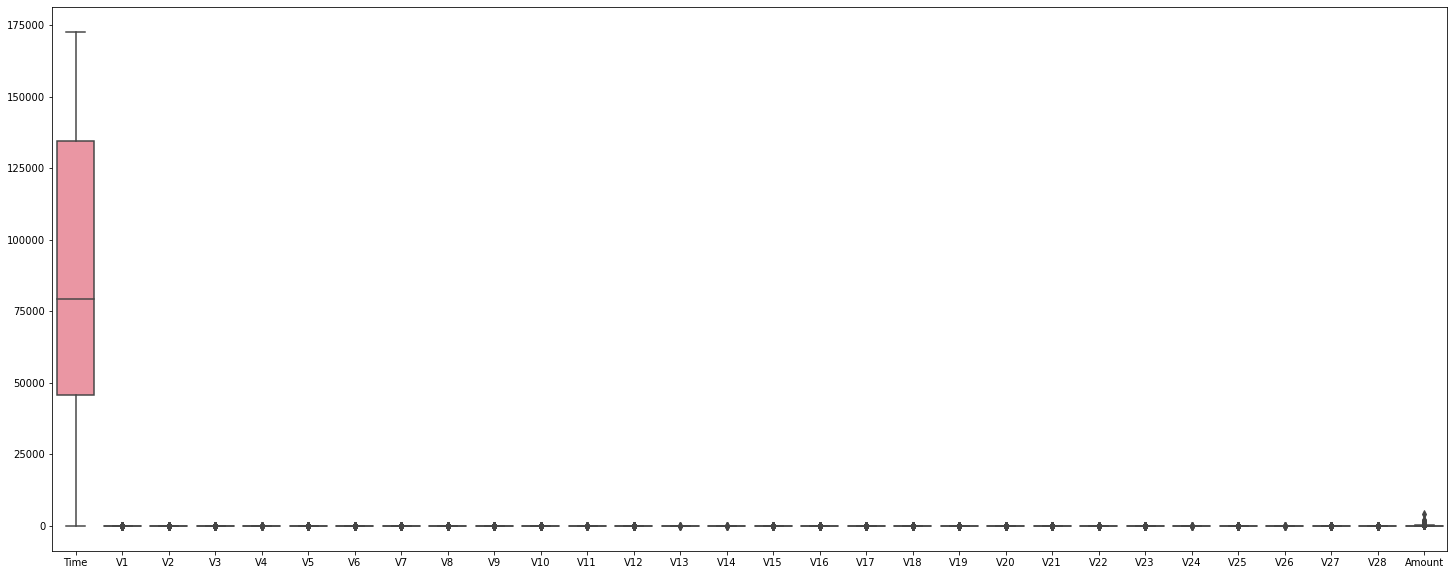

In [203]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=X)

by looking at distributions of **V** columns Standard Scaling looks good for Time and Amount cols. Outlier detection and removal can be done manually:

***wow!! no outliers***

In [204]:
# def RemoveOutlier(cols, df):
#     for col in cols:
#         q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
#         iqr = q75 - q25
#         cut_off = iqr * 1.5
#         lower, upper = q25 - cut_off, q75 + cut_off
#         outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
#         df = df.drop(df[(df[col] > upper) | (df[col] < lower)].index)
#         return df

# Work for Pipeline

In [205]:
t = [
        ('num', StandardScaler(), ['Time', 'Amount'])
    ]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')

In [206]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for model in classifiers:
    pipeline = Pipeline(steps=[('t', transformer), ('m', model)])
    skf = StratifiedKFold(n_splits=10)
    score = cross_val_score(pipeline, X, y, cv=skf).mean()
    print(f'Model: {model}  score: {score}')
    

Model: KNeighborsClassifier(n_neighbors=3)  score: 0.9400123685837972
Model: SVC(C=0.025, probability=True)  score: 0.9074005359719646
Model: DecisionTreeClassifier()  score: 0.8840548340548342
Model: RandomForestClassifier()  score: 0.9328901257472687
Model: AdaBoostClassifier()  score: 0.9175530818387962
Model: GradientBoostingClassifier()  score: 0.9328695114409401
